# The phosphatases TCPTP, PTPN22, and SHP1 play unique roles in T cell phosphotyrosine maintenance and feedback regulation of the TCR


<b>Authors:</b>

Aurora Callahan1, Aisharja Mojumdar2, Mengzhou Hu2, Amber Wang1, Alijah A Griffith1, Nicholas Huang1, Xien Yu Chua2, Nick Mroz1, Ryan Z. Puterbaugh2, Shanelle Reilly1, Arthur Salomon1,2,*

<b>Affiliations:</b>

1 Department of Molecular Biology, Cell Biology and Biochemistry, Brown University, Providence, RI, 02903, United States of America

2 Department of Molecular Pharmacology, Physiology, and Biotechnology, Brown University, Providence, RI, 02903, United States of America

.* Corresponding Author, art@drsalomon.com


<b>Abstract</b>

The protein tyrosine phosphatases (PTPs) TCPTP, PTPN22, and SHP1 are critical regulators of the activating phophotyrosine (pY) site on the initiating T cell kinase, LckY394, but the broader implications of these phosphatases in T cell receptor (TCR) signalling and T cell biology remain unclear. By combining CRISPR/Cas9 gene editing and mass spectrometry, we evaluate the protein- and pY-level effects of TCPTP, PTPN22, and SHP1 in the Jurkat T cell model system. We find that deletion of each phosphatase corresponds to unique changes in the proteome of T cells with few large-scale changes to TCR signalling proteins. Notably, PTPN22 and SHP1 deletions have opposing effects on pY abundance globally, while TCPTP deletion modestly elevates pY levels. Finally, we show that TCPTP is indirectly involved in Erk1/2 positive feedback to the TCR. Overall, our work provides evidence for alternative functions of three T cell phosphatases long thought to be redundant.

<b>Notebook Synopsis</b>

This notebook uses the 

In [1]:
## Importables
from platform import python_version
print(f"Python version {python_version()}")

import sys
import os

sys.path.append("/windir/c/Users/redas/Desktop/jupyter_directory/helpers/src/helpers/")

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import numpy as np
from sklearn.decomposition import PCA, NMF
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, normalize
from math import log10, log2, ceil, floor, sqrt
from missingpy import MissForest

# And grab the helpers
import sys
sys.path.append("/windir/c/Users/redas/Desktop/jupyter_directory/helpers/src/helpers/")
from helpers import general_helpers as gh
from helpers import stats_helpers as sh
from helpers import mpl_plotting_helpers as mph
from helpers.proteomics_helpers import Peptide

Python version 3.10.12
Loading the module: helpers.general_helpers

Loading the module: helpers.stats_helpers.py

numpy        1.22.4
scipy         1.8.1
pandas        1.4.2

Loading the module: helpers.mpl_plotting_helpers

Loading the module: helpers.argcheck_helpers

Loading the module: helpers.pandas_helpers

pandas        1.4.2
numpy         1.22.4

matplotlib    3.5.2
numpy         1.22.4



In [2]:
## Variables
filename = "PTPN22_TCPTP_SHP1_U0126_pTyr_DDA_2.xls"

rename_cols = {"UNIPROT Gene Name" : "Gene name",                                
               "phosphosite annotated" : "Site",                            
                "peakarea manual 1 rep1 thresholded timepoint1" : "JE6 0m DMSO R1",   
                "peakarea manual 1 rep2 thresholded timepoint1" : "JE6 0m DMSO R2",   
                "peakarea manual 1 rep3 thresholded timepoint1" : "JE6 0m DMSO R3",   
                "peakarea manual 1 rep4 thresholded timepoint1" : "JE6 0m DMSO R4",
                "peakarea manual 1 rep5 thresholded timepoint1" : "JE6 0m DMSO R5",
                "peakarea manual 1 rep1 thresholded timepoint2" : "JE6 5m DMSO R1",   
                "peakarea manual 1 rep2 thresholded timepoint2" : "JE6 5m DMSO R2",   
                "peakarea manual 1 rep3 thresholded timepoint2" : "JE6 5m DMSO R3",   
                "peakarea manual 1 rep4 thresholded timepoint2" : "JE6 5m DMSO R4",
                "peakarea manual 1 rep5 thresholded timepoint2" : "JE6 5m DMSO R5", 
                "peakarea manual 1 rep1 thresholded timepoint3" : "JE6 0m U0126 R1",   
                "peakarea manual 1 rep2 thresholded timepoint3" : "JE6 0m U0126 R2",   
                "peakarea manual 1 rep3 thresholded timepoint3" : "JE6 0m U0126 R3",   
                "peakarea manual 1 rep4 thresholded timepoint3" : "JE6 0m U0126 R4",
                "peakarea manual 1 rep5 thresholded timepoint3" : "JE6 0m U0126 R5",
                "peakarea manual 1 rep1 thresholded timepoint4" : "JE6 5m U0126 R1",   
                "peakarea manual 1 rep2 thresholded timepoint4" : "JE6 5m U0126 R2",   
                "peakarea manual 1 rep3 thresholded timepoint4" : "JE6 5m U0126 R3",   
                "peakarea manual 1 rep4 thresholded timepoint4" : "JE6 5m U0126 R4",
                "peakarea manual 1 rep5 thresholded timepoint4" : "JE6 5m U0126 R5", 
               "peakarea manual 1 rep1 thresholded timepoint9" : "J.TCPTP- 0m DMSO R1",   
                "peakarea manual 1 rep2 thresholded timepoint9" : "J.TCPTP- 0m DMSO R2",   
                "peakarea manual 1 rep3 thresholded timepoint9" : "J.TCPTP- 0m DMSO R3",   
                "peakarea manual 1 rep4 thresholded timepoint9" : "J.TCPTP- 0m DMSO R4",
                "peakarea manual 1 rep5 thresholded timepoint9" : "J.TCPTP- 0m DMSO R5",
                "peakarea manual 1 rep1 thresholded timepoint10" : "J.TCPTP- 5m DMSO R1",   
                "peakarea manual 1 rep2 thresholded timepoint10" : "J.TCPTP- 5m DMSO R2",   
                "peakarea manual 1 rep3 thresholded timepoint10" : "J.TCPTP- 5m DMSO R3",   
                "peakarea manual 1 rep4 thresholded timepoint10" : "J.TCPTP- 5m DMSO R4",
                "peakarea manual 1 rep5 thresholded timepoint10" : "J.TCPTP- 5m DMSO R5", 
                "peakarea manual 1 rep1 thresholded timepoint11" : "J.TCPTP- 0m U0126 R1",   
                "peakarea manual 1 rep2 thresholded timepoint11" : "J.TCPTP- 0m U0126 R2",   
                "peakarea manual 1 rep3 thresholded timepoint11" : "J.TCPTP- 0m U0126 R3",   
                "peakarea manual 1 rep4 thresholded timepoint11" : "J.TCPTP- 0m U0126 R4",
                "peakarea manual 1 rep5 thresholded timepoint11" : "J.TCPTP- 0m U0126 R5",
                "peakarea manual 1 rep1 thresholded timepoint12" : "J.TCPTP- 5m U0126 R1",   
                "peakarea manual 1 rep2 thresholded timepoint12" : "J.TCPTP- 5m U0126 R2",   
                "peakarea manual 1 rep3 thresholded timepoint12" : "J.TCPTP- 5m U0126 R3",   
                "peakarea manual 1 rep4 thresholded timepoint12" : "J.TCPTP- 5m U0126 R4",
#                "peakarea manual 1 rep5 thresholded timepoint12" : "J.TCPTP- 5m U0126 R5",
                "peakarea manual 1 rep1 thresholded timepoint5" : "J.PTPN22- 0m DMSO R1",   
                "peakarea manual 1 rep2 thresholded timepoint5" : "J.PTPN22- 0m DMSO R2",   
                "peakarea manual 1 rep3 thresholded timepoint5" : "J.PTPN22- 0m DMSO R3",   
                "peakarea manual 1 rep4 thresholded timepoint5" : "J.PTPN22- 0m DMSO R4",
                "peakarea manual 1 rep5 thresholded timepoint5" : "J.PTPN22- 0m DMSO R5",
                "peakarea manual 1 rep1 thresholded timepoint6" : "J.PTPN22- 5m DMSO R1",   
                "peakarea manual 1 rep2 thresholded timepoint6" : "J.PTPN22- 5m DMSO R2",   
                "peakarea manual 1 rep3 thresholded timepoint6" : "J.PTPN22- 5m DMSO R3",   
                "peakarea manual 1 rep4 thresholded timepoint6" : "J.PTPN22- 5m DMSO R4",
                "peakarea manual 1 rep5 thresholded timepoint6" : "J.PTPN22- 5m DMSO R5", 
                "peakarea manual 1 rep1 thresholded timepoint7" : "J.PTPN22- 0m U0126 R1",   
                "peakarea manual 1 rep2 thresholded timepoint7" : "J.PTPN22- 0m U0126 R2",   
                "peakarea manual 1 rep3 thresholded timepoint7" : "J.PTPN22- 0m U0126 R3",   
                "peakarea manual 1 rep4 thresholded timepoint7" : "J.PTPN22- 0m U0126 R4",
                "peakarea manual 1 rep5 thresholded timepoint7" : "J.PTPN22- 0m U0126 R5",
                "peakarea manual 1 rep1 thresholded timepoint8" : "J.PTPN22- 5m U0126 R1",   
                "peakarea manual 1 rep2 thresholded timepoint8" : "J.PTPN22- 5m U0126 R2",   
                "peakarea manual 1 rep3 thresholded timepoint8" : "J.PTPN22- 5m U0126 R3",   
                "peakarea manual 1 rep4 thresholded timepoint8" : "J.PTPN22- 5m U0126 R4",
                "peakarea manual 1 rep5 thresholded timepoint8" : "J.PTPN22- 5m U0126 R5",
                "peakarea manual 1 rep1 thresholded timepoint13" : "J.SHP1- 0m DMSO R1",   
                "peakarea manual 1 rep2 thresholded timepoint13" : "J.SHP1- 0m DMSO R2",   
                "peakarea manual 1 rep3 thresholded timepoint13" : "J.SHP1- 0m DMSO R3",   
                "peakarea manual 1 rep4 thresholded timepoint13" : "J.SHP1- 0m DMSO R4",
                "peakarea manual 1 rep5 thresholded timepoint13" : "J.SHP1- 0m DMSO R5",
                "peakarea manual 1 rep1 thresholded timepoint14" : "J.SHP1- 5m DMSO R1",   
                "peakarea manual 1 rep2 thresholded timepoint14" : "J.SHP1- 5m DMSO R2",   
                "peakarea manual 1 rep3 thresholded timepoint14" : "J.SHP1- 5m DMSO R3",   
                "peakarea manual 1 rep4 thresholded timepoint14" : "J.SHP1- 5m DMSO R4",
                "peakarea manual 1 rep5 thresholded timepoint14" : "J.SHP1- 5m DMSO R5", 
                "peakarea manual 1 rep1 thresholded timepoint15" : "J.SHP1- 0m U0126 R1",   
                "peakarea manual 1 rep2 thresholded timepoint15" : "J.SHP1- 0m U0126 R2",   
                "peakarea manual 1 rep3 thresholded timepoint15" : "J.SHP1- 0m U0126 R3",   
                "peakarea manual 1 rep4 thresholded timepoint15" : "J.SHP1- 0m U0126 R4",
                "peakarea manual 1 rep5 thresholded timepoint15" : "J.SHP1- 0m U0126 R5",
                "peakarea manual 1 rep1 thresholded timepoint16" : "J.SHP1- 5m U0126 R1",   
                "peakarea manual 1 rep2 thresholded timepoint16" : "J.SHP1- 5m U0126 R2",   
                "peakarea manual 1 rep3 thresholded timepoint16" : "J.SHP1- 5m U0126 R3",   
                "peakarea manual 1 rep4 thresholded timepoint16" : "J.SHP1- 5m U0126 R4",
                "peakarea manual 1 rep5 thresholded timepoint16" : "J.SHP1- 5m U0126 R5",        
                "assigned sequence" : "Modified Sequence", 
                "Kegg unique index" : "KEGG category",
                "peptide sequence GCT format centered on 1st site" : "Flanking Sequence (1)",
                "peptide sequence GCT format centered on 2nd site" : "Flanking Sequence (2)",
                "peptide sequence GCT format centered on 3rd site" : "Flanking Sequence (3)"
              }

colours = [mph.colours["monos"][3:7],
           mph.colours["pinks"][2:6],
           mph.colours["blues"][-4:],
           mph.colours["purples"][-4:]]


group_inds = {"JE6 0m DMSO" : [2,3,4,5,6],
              "JE6 5m DMSO" : [7,8,9,10,11],
              "JE6 0m U0126" : [12,13,14,15,16],
              "JE6 5m U0126" : [17,18,19,20,21],
              "TCP 0m DMSO"  : [22,23,24,25,26],
              "TCP 5m DMSO"  : [27,28,29,30,31],
              "TCP 0m U0126" : [32,33,34,35,36],
              "TCP 5m U0126" : [37,38,39,40],
              "N22 0m DMSO"  : [41,42,43,44,45],
              "N22 5m DMSO"  : [46,47,48,49,50],
              "N22 0m U0126" : [51,52,53,54,55],
              "N22 5m U0126" : [56,57,58,59,60],
              "SHP 0m DMSO"  : [61,62,63,64,65],
              "SHP 5m DMSO"  : [66,67,68,69,70],
              "SHP 0m U0126" : [71,72,73,74,75],
              "SHP 5m U0126" : [76,77,78,79,80]
             }

comparisons = [("TCP 0m DMSO", "JE6 0m DMSO", "basald"),
               ("N22 0m DMSO", "JE6 0m DMSO", "basald"),
               ("SHP 0m DMSO", "JE6 0m DMSO", "basald"), # Basal state/JE6 comps DMSO
               ("TCP 5m DMSO", "JE6 5m DMSO", "stimd"),
               ("N22 5m DMSO", "JE6 5m DMSO", "stimd"),
               ("SHP 5m DMSO", "JE6 5m DMSO", "stimd"), # Stim state/JE6 comps DMSO
               ("JE6 5m DMSO", "JE6 0m DMSO", "5m0md"),
               ("TCP 5m DMSO", "TCP 0m DMSO", "5m0md"),
               ("N22 5m DMSO", "N22 0m DMSO", "5m0md"),
               ("SHP 5m DMSO", "SHP 0m DMSO", "5m0md"), # 5m Stims DMSO
               ("TCP 0m U0126", "JE6 0m U0126", "basalu"),
               ("N22 0m U0126", "JE6 0m U0126", "basalu"),
               ("SHP 0m U0126", "JE6 0m U0126", "basalu"), # Basal state/JE6 comps DMSO
               ("TCP 5m U0126", "JE6 5m U0126", "stimu"),
               ("N22 5m U0126", "JE6 5m U0126", "stimu"),
               ("SHP 5m U0126", "JE6 5m U0126", "stimu"), # Stim state/JE6 comps DMSO
               ("JE6 0m U0126", "JE6 0m DMSO", "basalpm"),
               ("TCP 0m U0126", "TCP 0m DMSO", "basalpm"),
               ("N22 0m U0126", "N22 0m DMSO", "basalpm"),
               ("SHP 0m U0126", "SHP 0m DMSO", "basalpm"), # Basal state +/- U0126
               ("JE6 5m U0126", "JE6 5m DMSO", "stimpm"),
               ("TCP 5m U0126", "TCP 5m DMSO", "stimpm"),
               ("N22 5m U0126", "N22 5m DMSO", "stimpm"),
               ("SHP 5m U0126", "SHP 5m DMSO", "stimpm"), # Stim state +/- U0126
               ("JE6 5m U0126", "JE6 0m U0126", "5m0mu"),
               ("TCP 5m U0126", "TCP 0m U0126", "5m0mu"),
               ("N22 5m U0126", "N22 0m U0126", "5m0mu"),
               ("SHP 5m U0126", "SHP 0m U0126", "5m0mu"), # 5m stims U0126
               ]

reps_2 = [3,8,13,18,23,28,33,38,42,47,52,57,62,67,72,77]

textdict = dict(fontfamily = "sans-serif",
                font = "Arial",
                fontsize = 8)

In [3]:
# Import the things for ssgsea
from py_scripts import generate_ssgsea_files as msf
from py_scripts import managing_ssgsea_outputs as mso

# For GCT file writing
## Need to keep only the input values and flanks

def ptmsea_transform(a_qvalue, a_foldchange, head = "No"):
    if type(a_qvalue) == str or type(a_foldchange) == str:
        return head
    if a_qvalue != a_qvalue or a_foldchange != a_foldchange:
        return float("nan")
    if 0 < a_foldchange < 1:
        return -10 * log10(a_qvalue) *-1
    else:
        return -10 * log10(a_qvalue) * 1

def duplicate_flanks(a_row,
                     flank_locs,   # list of indices for the places with flanking sequences
                     ):
    flank_num = len(flank_locs)
    new_rows = [[] for _ in range(flank_num)] # Make the new rows
    flanks = []
    f_ind = -1
    seen = False
    for i in range(len(a_row)):               # loop over the size of the row
        if i not in flank_locs:               # If this is not a flank
            for j in range(flank_num):
                new_rows[j].append(a_row[i])  # Add this info to each sublist
        elif i in flank_locs:
            flanks.append(a_row[i])
            if not seen:
                for j in range(flank_num):
                    new_rows[j].append("FLANK ME BABY")
                seen = True
            if f_ind == -1:
                f_ind = i
    for i in range(flank_num):
        new_rows[i][f_ind] = flanks[i]
    return new_rows

def dup_flanks_matrix(a_matrix, flank_locs):
    new_matr = []
    for row in a_matrix:
        exp = duplicate_flanks(row, flank_locs)
        new_matr += exp
    return new_matr

def write_gct_file(index,    # Flanking sequences with -p 
                    values,   # values per flanking sequence, len(values[i]) == len(headers), len(values) == len(index)
                    headers, # Headers for the columns
                    outfile = "bullshit.gct" # File to write, include path and .gct
                    ):
    # GCT file has some info up top, we take it
    gct = [[fr"#1.3"], # Tells programs its a GCT 1.3 file
           [len(index), len(headers), 0, 0], # number of rows, number of cols, and metadata shit
           ["flanking_seq"] + headers] 
    for i in range(len(index)):
        gct.append([index[i]] + values[i])
    gct = [gh.list_to_str(row) for row in gct]
    gh.write_outfile(gct, outfile, writestyle = "w")
    return None
def keep_first(a_matrix, keycol = "U_ID", heads = 0):
    keepers = []
    seen = []
    keyind = a_matrix[heads].index(keycol)
    for row in a_matrix:
        if row[keyind] not in seen:
            keepers.append(row)
            seen.append(row[keyind])
    return keepers


Loading the module: helpers.general_helpers

Loading the module: helpers.argcheck_helpers



In [4]:
# loading files in and massaging the data


def filter_df_rows(a_df, column = "U_ID"):
    cols = list(a_df.columns)
    keycol = cols.index(column)
    a_list = list(a_df.to_numpy())
    first_occ = []
    first_key = []
    for row in a_list:
        if row[keycol] not in first_key:
            first_occ.append(row)
            first_key.append(row[keycol])
        else:
            pass
    return pd.DataFrame(first_occ, columns = cols)

def read_and_filter(a_file, columns, rename = False):
    file = pd.read_excel(a_file)
    file = file[columns]
    if rename:
        file = file.rename(rename, axis = "columns")
    file["U_ID"] = file["Gene name"].map(str) + "$^{" + file["Site"].map(str) + "}$"
    file["Median Row Intensity"] = file[[col for col in list(file.columns) if " R" in col]].median(axis=1)
    file["Total Missing Values in Row"] = file[[col for col in list(file.columns) if " R" in col]].isnull().sum(axis=1)
    f = sorted([list(row) for row in file.to_numpy()], key = lambda x: (x[-3], x[-1], -x[-2]))
    print(len(f))
    f = keep_first([list(file.columns)] + f, keycol = "U_ID", heads = 0)
    print(len(f))
    file = pd.DataFrame(f[1:], columns = f[0])
    return file

def find_lims(all_qs,all_fcs):
    qs = gh.unpack_list(all_qs)
    fc = [abs(item) for item in gh.unpack_list(all_fcs) if item == item]
    return round(-log10(min(qs)))+1, round(max(fc))+1

In [5]:
# Filters and removes redundancy, fewest MVs and highest median intensity
file = read_and_filter(filename, list(rename_cols.keys()), rename_cols)
if os.path.exists("tmp/imputed.csv"):
    imputed_df = pd.read_csv("tmp/imputed.csv")
    hist_data = [list(np.log2(file[v]).to_numpy()) for k, v in rename_cols.items() if " R" in v]
    imputed = [list(np.log2(imputed_df[v]).to_numpy()) for k, v in rename_cols.items() if " R" in v]
    for col in rename_cols.values() :
        if "O R" in col or "6 R" in col:
            file[col] = np.log2(imputed_df[col])
else:
    imputer = MissForest(random_state = 69)
    imputed_data = imputer.fit_transform(file[colnames].to_numpy().transpose())
    imputed_df = pd.DataFrame(imputed_data.transpose(), columns = [col for col in list(file.columns) if "O R" in col or "6 R" in col])
    imputed_df.to_csv("tmp/imputed.csv")
    hist_data = [list(np.log2(file[v]).to_numpy()) for k, v in rename_cols.items() if " R" in v]
    imputed = [list(np.log2(imputed[v]).to_numpy()) for k, v in rename_cols.items() if " R" in v]
    for col in rename_cols.values() :
        if "O R" in col or "6 R" in col:
            file[col] = np.log2(imputed_df[col])

# Get the rows of file, which are the imputed values
rows = [list(row) for row in file.to_numpy()]

fc = [[sh.mean([row[x] for x in group_inds[c[0]]]) - sh.mean([row[x] for x in group_inds[c[1]]]) for row in rows]
      for c in comparisons]

tests = [[sh.TTest([row[x] for x in group_inds[c[0]]],
                   [row[x] for x in group_inds[c[1]]],
                   test_type = "w",
                   threshold = 3,
                   labels = False).output[0]["pvalue"][0] for row in rows] for c in comparisons]
unpacked_ps = gh.unpack_list(tests)
global_q = list(sh.storey(unpacked_ps, pi0=1)["qvalue"].astype(float))
packed_qs = [global_q[len(fc[0])*i:len(fc[0])*(i+1)] for i in range(len(fc))]

for i in range(len(tests)):
    file[f"{comparisons[i][0]} vs {comparisons[i][1]} {comparisons[i][2]} Fold change"] = fc[i]
for i in range(len(tests)):
    file[f"{comparisons[i][0]} vs {comparisons[i][1]} {comparisons[i][2]} p-value"] = tests[i]
for i in range(len(tests)):
    file[f"{comparisons[i][0]} vs {comparisons[i][1]} {comparisons[i][2]} q-value"] = packed_qs[i]
file = file[file["Gene name"].notnull()]

1222
798


/home/redas/py3/lib/python3.10/site-packages/helpers/stats_helpers.py:844: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  type(pd.Series()),
/home/redas/py3/lib/python3.10/site-packages/helpers/stats_helpers.py:850: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  type(pd.Series()),
/home/redas/py3/lib/python3.10/site-packages/helpers/stats_helpers.py:853: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(pvals) == type(pd.Series()) or type(pvals) == type(pd.DataFrame()):
/home/redas/py3/lib/python3.10/site-packages/helpers/stats_helpers.py:867: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a futu

Value for pi0: 1


In [6]:
file

,Gene name,Site,JE6 0m DMSO R1,JE6 0m DMSO R2,JE6 0m DMSO R3,JE6 0m DMSO R4,JE6 0m DMSO R5,JE6 5m DMSO R1,JE6 5m DMSO R2,JE6 5m DMSO R3,...,N22 0m U0126 vs N22 0m DMSO basalpm q-value,SHP 0m U0126 vs SHP 0m DMSO basalpm q-value,JE6 5m U0126 vs JE6 5m DMSO stimpm q-value,TCP 5m U0126 vs TCP 5m DMSO stimpm q-value,N22 5m U0126 vs N22 5m DMSO stimpm q-value,SHP 5m U0126 vs SHP 5m DMSO stimpm q-value,JE6 5m U0126 vs JE6 0m U0126 5m0mu q-value,TCP 5m U0126 vs TCP 0m U0126 5m0mu q-value,N22 5m U0126 vs N22 0m U0126 5m0mu q-value,SHP 5m U0126 vs SHP 0m U0126 5m0mu q-value
0,ABCF1,Y250,17.140692,15.725153,16.930033,17.206375,17.253571,16.887139,16.651074,16.420996,...,0.425451,0.159455,0.484991,0.574115,0.676953,0.931278,0.992533,0.659588,0.922119,0.885313
1,ABCF1,Y378,20.257669,20.604974,20.565505,20.679103,20.597820,20.023408,19.188087,20.262523,...,0.526421,0.620819,0.033628,0.556999,0.534853,0.024759,0.891429,0.520572,0.652013,0.559682
2,ABI1,Y213,20.020344,19.647056,18.801945,19.938029,19.784919,19.592889,19.700348,19.994613,...,0.014412,0.721748,0.156977,0.746058,0.002867,0.869692,0.167582,0.291748,0.148197,0.294119
3,ABI1,Y455,24.140794,22.749578,28.571739,27.844480,21.464530,20.310939,28.768062,20.453508,...,0.358452,0.720427,0.211322,0.387121,0.210843,0.132037,0.868404,0.660410,0.191616,0.612580
4,ABI2,Y213,18.524844,17.743922,17.774235,17.555916,16.618629,18.879975,18.675781,17.616456,...,0.004129,0.820016,0.071687,0.024026,0.001662,0.212327,0.304018,0.658058,0.678958,0.271001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,ZNF598,Y306,18.593497,18.391025,18.375298,18.819097,18.260929,18.197797,18.913027,19.736656,...,0.441869,0.745146,0.074672,0.072865,0.953512,0.179178,0.213320,0.113232,0.311130,0.470606
786,ZNF726P1,T41Y46,18.082892,18.479966,18.347838,18.143886,18.263062,18.891701,18.037815,18.258115,...,0.003058,0.551466,0.055015,0.390907,0.001890,0.028830,0.197315,0.805868,0.934566,0.323336
787,ZNF84,Y197,19.705673,19.119367,16.217522,16.058943,16.149410,20.179359,16.255527,16.481390,...,0.199921,0.830540,0.921270,0.851270,0.598700,0.721416,0.403370,0.341077,0.186363,0.908430
788,ZRANB2,Y114,19.336001,20.745143,20.769566,20.809710,19.789331,20.676963,20.611299,21.665515,...,0.316105,0.257019,0.129532,0.062784,0.051808,0.652676,0.538815,0.365297,0.967773,0.732780


In [7]:
basald = [list(row) for row in file[[c for c in list(file.columns) if "basald" in c]].to_numpy()]
basald = gh.transpose(*basald)
basald = [basald[:3], basald[-3:]]

stimd = [list(row) for row in file[[c for c in list(file.columns) if "stimd" in c]].to_numpy()]
stimd = gh.transpose(*stimd)
print(len(stimd))
stimd = [stimd[:3], stimd[-3:]]

dmso_mincomps_fc = [basald[0], stimd[0]]
dmso_mincomps_qs = [basald[1], stimd[1]]
print(len(dmso_mincomps_fc), len(dmso_mincomps_qs))
print([len(r) for r in dmso_mincomps_fc], [len(r) for r in dmso_mincomps_qs])

9
2 2
[3, 3] [3, 3]


In [8]:
[c for c in list(file.columns) if "stimd" in c]

['TCP 5m DMSO vs JE6 5m DMSO stimd Fold change',
 'N22 5m DMSO vs JE6 5m DMSO stimd Fold change',
 'SHP 5m DMSO vs JE6 5m DMSO stimd Fold change',
 'TCP 5m DMSO vs JE6 5m DMSO stimd p-value',
 'N22 5m DMSO vs JE6 5m DMSO stimd p-value',
 'SHP 5m DMSO vs JE6 5m DMSO stimd p-value',
 'TCP 5m DMSO vs JE6 5m DMSO stimd q-value',
 'N22 5m DMSO vs JE6 5m DMSO stimd q-value',
 'SHP 5m DMSO vs JE6 5m DMSO stimd q-value']

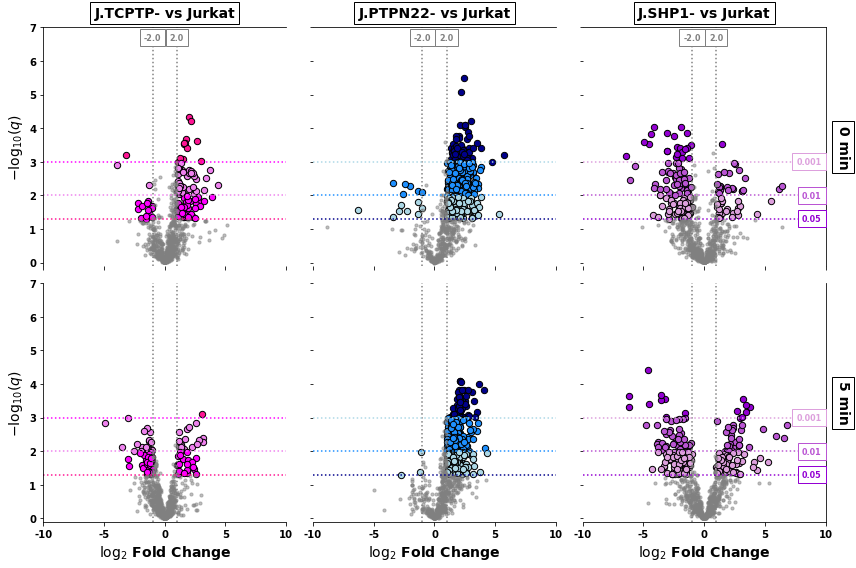

In [9]:
mph.volcano_array(dmso_mincomps_qs, dmso_mincomps_fc,
                  sig_cutoffs = [0.05,0.01,0.001],
                  colours = [[colours[1][:3], colours[2][:3], colours[3][:3]],
                             [colours[1][:3], colours[2][:3], colours[3][:3]]],
                  top_labels = ["J.TCPTP- vs Jurkat", "J.PTPN22- vs Jurkat", "J.SHP1- vs Jurkat"],
                  right_labels = ["0 min", "5 min"],
                  left_labels = [fr"$-\log_{{10}}(q)$", fr"$-\log_{{10}}(q)$"],
                  bottom_labels = [fr"$\log_{{2}}$ Fold Change" for _ in range(3)],
                  fc_cutoff = 1,
                  save_arr = "figs/volcano_basald_stimd.pdf",
                  xlim = 10,
                  ylim = 7)

In [10]:
s50d = [list(row) for row in file[[c for c in list(file.columns) if "5m0md" in c]].to_numpy()]
s50d = gh.transpose(*s50d)
s50d = [s50d[:4], s50d[-4:]]

s50d_fc = [s50d[0]]
s50d_qs = [s50d[1]]


In [11]:
[c for c in list(file.columns) if "5m0md" in c]

['JE6 5m DMSO vs JE6 0m DMSO 5m0md Fold change',
 'TCP 5m DMSO vs TCP 0m DMSO 5m0md Fold change',
 'N22 5m DMSO vs N22 0m DMSO 5m0md Fold change',
 'SHP 5m DMSO vs SHP 0m DMSO 5m0md Fold change',
 'JE6 5m DMSO vs JE6 0m DMSO 5m0md p-value',
 'TCP 5m DMSO vs TCP 0m DMSO 5m0md p-value',
 'N22 5m DMSO vs N22 0m DMSO 5m0md p-value',
 'SHP 5m DMSO vs SHP 0m DMSO 5m0md p-value',
 'JE6 5m DMSO vs JE6 0m DMSO 5m0md q-value',
 'TCP 5m DMSO vs TCP 0m DMSO 5m0md q-value',
 'N22 5m DMSO vs N22 0m DMSO 5m0md q-value',
 'SHP 5m DMSO vs SHP 0m DMSO 5m0md q-value']

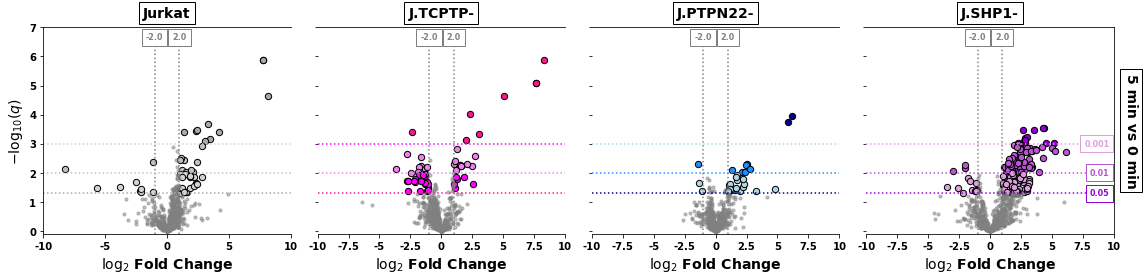

In [12]:
mph.volcano_array(s50d_qs, s50d_fc,
                  sig_cutoffs = [0.05,0.01,0.001],
                  colours = [[colours[0][:3], colours[1][:3], colours[2][:3], colours[3][:3]]],
                  top_labels = ["Jurkat", "J.TCPTP-", "J.PTPN22-", "J.SHP1-"],
                  right_labels = ["5 min vs 0 min"],
                  left_labels = [fr"$-\log_{{10}}(q)$" ],
                  bottom_labels = [fr"$\log_{{2}}$ Fold Change" for _ in range(4)],
                  fc_cutoff = 1,
                  save_arr = "figs/volcano_5m0md.pdf",
                  xlim = 10,
                  ylim = 7)

In [13]:
s50u = [list(row) for row in file[[c for c in list(file.columns) if "5m0mu" in c]].to_numpy()]
s50u = gh.transpose(*s50u)
s50u = [s50u[:4], s50u[-4:]]

s50u_fc = [s50u[0]]
s50u_qs = [s50u[1]]

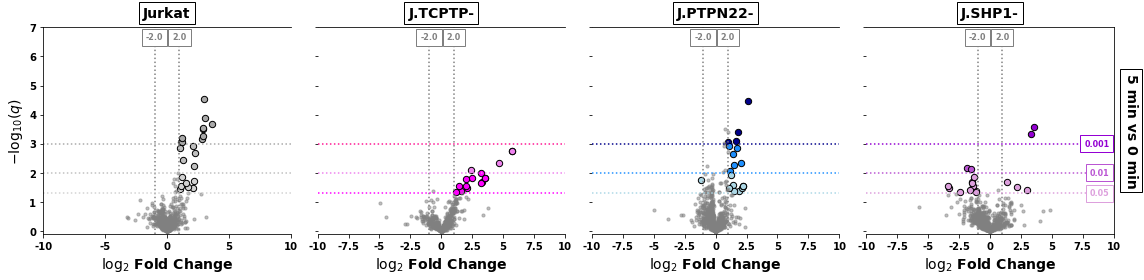

In [14]:
mph.volcano_array(s50u_qs, s50u_fc,
                  sig_cutoffs = [0.001,0.01,0.05],
                  colours = [[colours[0][:3], colours[1][:3], colours[2][:3], colours[3][:3]]],
                  top_labels = ["Jurkat", "J.TCPTP-", "J.PTPN22-", "J.SHP1-"],
                  right_labels = ["5 min vs 0 min"],
                  left_labels = [fr"$-\log_{{10}}(q)$" ],
                  bottom_labels = [fr"$\log_{{2}}$ Fold Change" for _ in range(4)],
                  fc_cutoff = 1,
                  save_arr = "figs/volcano_5m0mu.pdf",
                  xlim = 10,
                  ylim = 7)

In [15]:
basalu = [list(row) for row in file[[c for c in list(file.columns) if "basalu" in c]].to_numpy()]
basalu = gh.transpose(*basalu)
basalu = [basalu[:3], basalu[-3:]]

stimu = [list(row) for row in file[[c for c in list(file.columns) if "stimu" in c]].to_numpy()]
stimu = gh.transpose(*stimu)
print(len(stimu))
stimu = [stimu[:3], stimu[-3:]]
print(len(stimu), [len(row) for row in stimu])

u_mincomps_fc = [basalu[0], stimu[0]]
u_mincomps_qs = [basalu[1], stimu[1]]

9
2 [3, 3]


In [16]:
[c for c in list(file.columns) if "stimu" in c]

['TCP 5m U0126 vs JE6 5m U0126 stimu Fold change',
 'N22 5m U0126 vs JE6 5m U0126 stimu Fold change',
 'SHP 5m U0126 vs JE6 5m U0126 stimu Fold change',
 'TCP 5m U0126 vs JE6 5m U0126 stimu p-value',
 'N22 5m U0126 vs JE6 5m U0126 stimu p-value',
 'SHP 5m U0126 vs JE6 5m U0126 stimu p-value',
 'TCP 5m U0126 vs JE6 5m U0126 stimu q-value',
 'N22 5m U0126 vs JE6 5m U0126 stimu q-value',
 'SHP 5m U0126 vs JE6 5m U0126 stimu q-value']

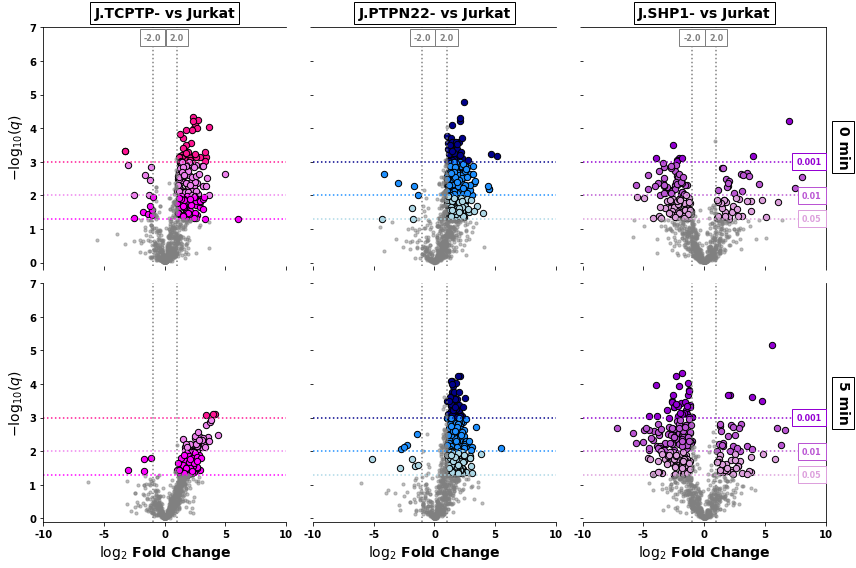

In [17]:
mph.volcano_array(u_mincomps_qs, u_mincomps_fc,
                  sig_cutoffs = [0.001,0.01,0.05],
                  colours = [[colours[1][:3], colours[2][:3], colours[3][:3]],
                             [colours[1][:3], colours[2][:3], colours[3][:3]]],
                  top_labels = ["J.TCPTP- vs Jurkat", "J.PTPN22- vs Jurkat", "J.SHP1- vs Jurkat"],
                  right_labels = ["0 min", "5 min"],
                  left_labels = [fr"$-\log_{{10}}(q)$", fr"$-\log_{{10}}(q)$"],
                  bottom_labels = [fr"$\log_{{2}}$ Fold Change" for _ in range(3)],
                  fc_cutoff = 1,
                  save_arr = "figs/volcano_basalu_stimu.pdf",
                  xlim = 10,
                  ylim = 7)

In [18]:
basalpm = [list(row) for row in file[[c for c in list(file.columns) if "basalpm" in c]].to_numpy()]
basalpm = gh.transpose(*basalpm)
basalpm = [basalpm[:4], basalpm[-4:]]

stimpm = [list(row) for row in file[[c for c in list(file.columns) if "stimpm" in c]].to_numpy()]
stimpm = gh.transpose(*stimpm)
stimpm = [stimpm[:4], stimpm[-4:]]

pm_mincomps_fc = [basalpm[0], stimpm[0]]
pm_mincomps_qs = [basalpm[1], stimpm[1]]

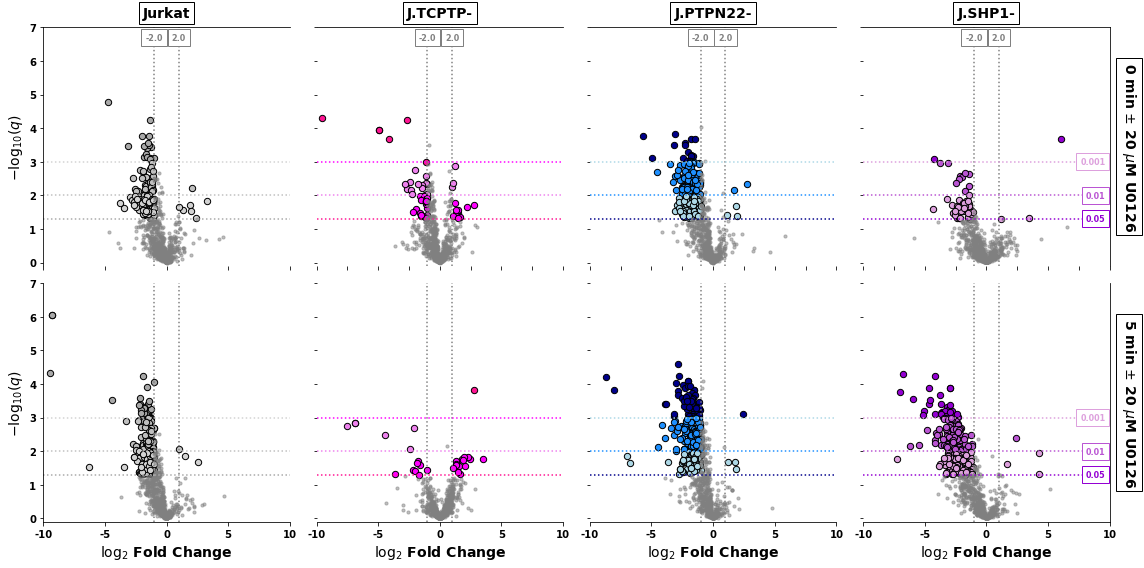

In [19]:
mph.volcano_array(pm_mincomps_qs, pm_mincomps_fc,
                  sig_cutoffs = [0.05,0.01,0.001],
                  colours = [[colours[0][:3], colours[1][:3], colours[2][:3], colours[3][:3]],
                             [colours[0][:3], colours[1][:3], colours[2][:3], colours[3][:3]]],
                  top_labels = ["Jurkat", "J.TCPTP-", "J.PTPN22-", "J.SHP1-"],
                  right_labels = ["0 min $\pm$ 20 $\mu$M U0126", "5 min $\pm$ 20 $\mu$M U0126"],
                  left_labels = [fr"$-\log_{{10}}(q)$", fr"$-\log_{{10}}(q)$"],
                  bottom_labels = [fr"$\log_{{2}}$ Fold Change" for _ in range(4)],
                  fc_cutoff = 1,
                  save_arr = "figs/volcano_basalpm_stimpm.pdf",
                  xlim = 10,
                  ylim = 7)

In [20]:
import venn

venn_colours = [(211/255,211/255,211/255,0.3),
                (255/255,0/255,162/255,0.4), 
                (0/255,137/255,255/255,0.4),
                (137/255,0/255,255/255,0.4)]

/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  warn((


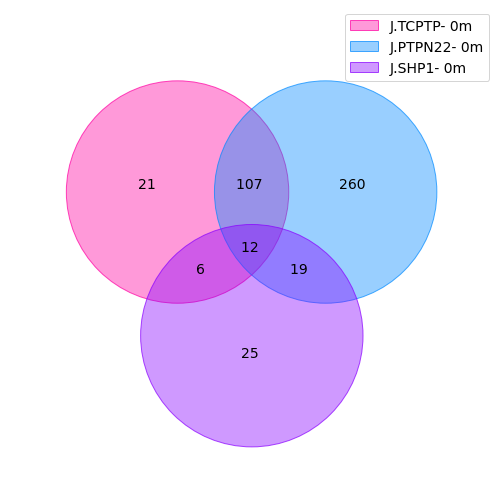

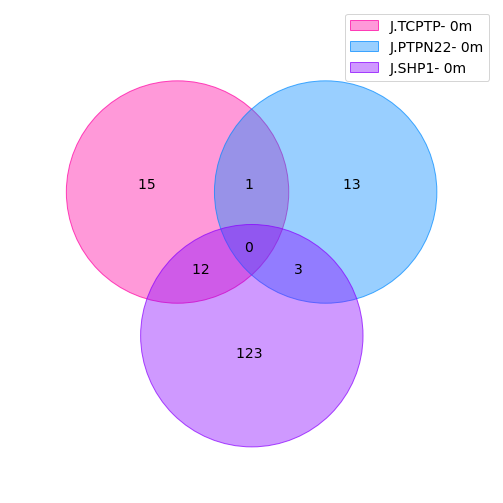

In [21]:
# want to make some venn diagrams, try basal first
basald_cols = [c for c in list(file.columns) if "basald" in c or c == "U_ID"]
basald_cols = [c for c in basald_cols if "p-value" not in c]
basald_values = [list(file[c].to_numpy()) for c in basald_cols]
basald_values = [list(zip(basald_values[0], basald_values[i+1], basald_values[3+(i+1)])) for i in range(3)]
basald_up = [[row for row in col if row[1] > 0 and row[2] < 0.05] for col in basald_values]
basald_up = [[row[0] for row in col] for col in basald_up]
basald_dn = [[row for row in col if row[1] < 0 and row[2] < 0.05] for col in basald_values]
basald_dn = [[row[0] for row in col] for col in basald_dn]
basald_dict = {basald_cols[i+1] : set(basald_values[i]) for i in range(3)}
labelsu = venn.get_labels([set(col) for col in basald_up])
figu, axu = venn.venn3(labelsu, names = ["J.TCPTP- 0m", 
                                      "J.PTPN22- 0m", 
                                      "J.SHP1- 0m"],
                     colors = venn_colours[1:])
plt.savefig("figs/venn_basald_up.pdf")
labelsd = venn.get_labels([set(col) for col in basald_dn])
figd, axd = venn.venn3(labelsd, names = ["J.TCPTP- 0m", 
                                      "J.PTPN22- 0m", 
                                      "J.SHP1- 0m"],
                     colors = venn_colours[1:])
plt.savefig("figs/venn_basald_dn.pdf")


/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  warn((


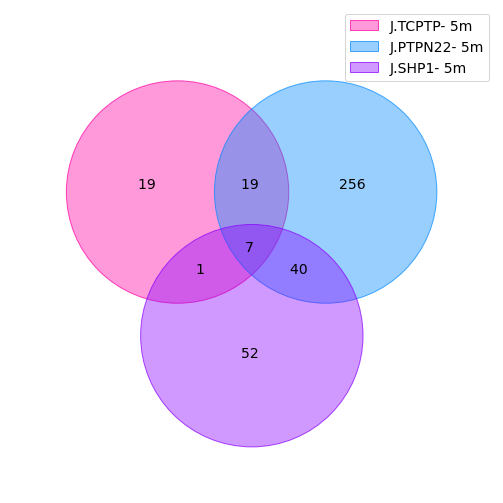

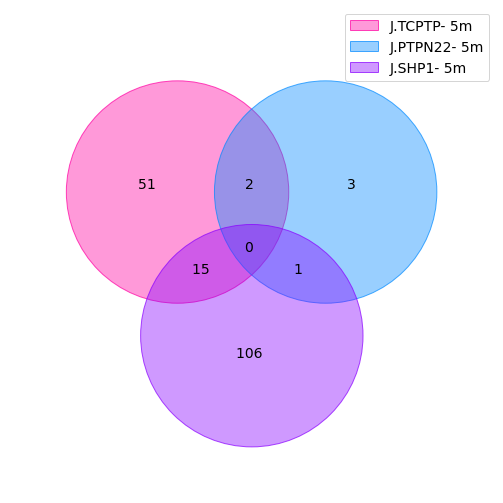

In [22]:
stimd_cols = [c for c in list(file.columns) if "stimd" in c or c == "U_ID"]
stimd_cols = [c for c in stimd_cols if "p-value" not in c]
stimd_values = [list(file[c].to_numpy()) for c in stimd_cols]
stimd_values = [list(zip(stimd_values[0], stimd_values[i+1], stimd_values[3+(i+1)])) for i in range(3)]
stimd_up = [[row for row in col if row[1] > 0 and row[2] < 0.05] for col in stimd_values]
stimd_up = [[row[0] for row in col] for col in stimd_up]
stimd_dn = [[row for row in col if row[1] < 0 and row[2] < 0.05] for col in stimd_values]
stimd_dn = [[row[0] for row in col] for col in stimd_dn]

labelsu = venn.get_labels([set(col) for col in stimd_up])
fig, ax = venn.venn3(labelsu, names = ["J.TCPTP- 5m", 
                                      "J.PTPN22- 5m", 
                                      "J.SHP1- 5m"],
                     colors = venn_colours[1:])
plt.savefig("figs/venn_stimd_up.pdf")
labelsd = venn.get_labels([set(col) for col in stimd_dn])
fig, ax = venn.venn3(labelsd, names = ["J.TCPTP- 5m", 
                                      "J.PTPN22- 5m", 
                                      "J.SHP1- 5m"],
                     colors = venn_colours[1:])
plt.savefig("figs/venn_stimd_dn.pdf")

/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher

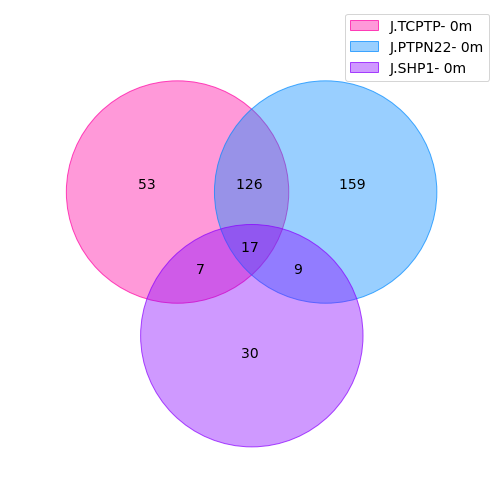

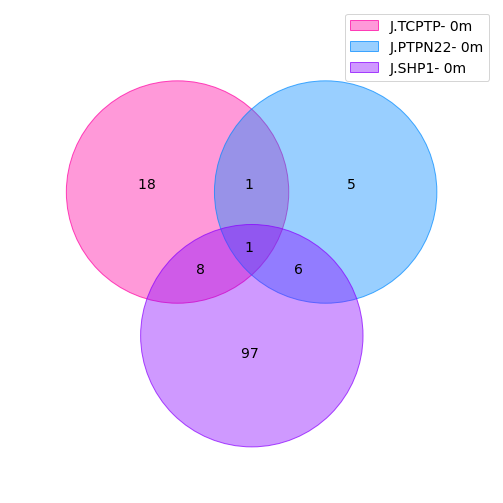

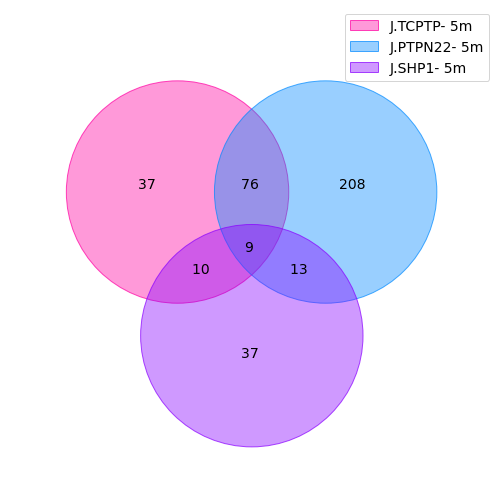

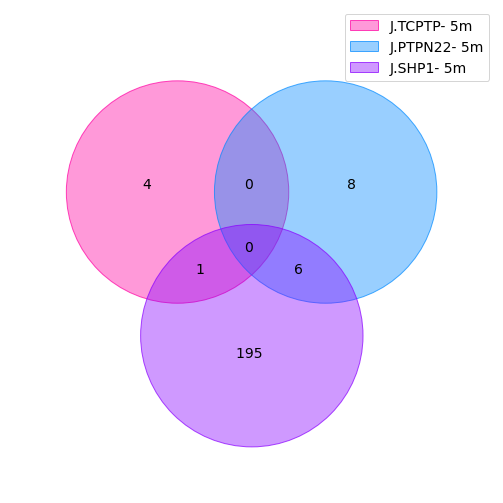

In [23]:
# want to make some venn diagrams, try basal first
basalu_cols = [c for c in list(file.columns) if "basalu" in c or c == "U_ID"]
basalu_cols = [c for c in basalu_cols if "p-value" not in c]
basalu_values = [list(file[c].to_numpy()) for c in basalu_cols]
basalu_values = [list(zip(basalu_values[0], basalu_values[i+1], basalu_values[3+(i+1)])) for i in range(3)]
basalu_up = [[row for row in col if row[1] > 0 and row[2] < 0.05] for col in basalu_values]
basalu_up = [[row[0] for row in col] for col in basalu_up]
basalu_dn = [[row for row in col if row[1] < 0 and row[2] < 0.05] for col in basalu_values]
basalu_dn = [[row[0] for row in col] for col in basalu_dn]
labelsu = venn.get_labels([set(col) for col in basalu_up])
figu, axu = venn.venn3(labelsu, names = ["J.TCPTP- 0m", 
                                      "J.PTPN22- 0m", 
                                      "J.SHP1- 0m"],
                     colors = venn_colours[1:])
plt.savefig("figs/venn_basalu_up.pdf")
labelsd = venn.get_labels([set(col) for col in basalu_dn])
figd, axd = venn.venn3(labelsd, names = ["J.TCPTP- 0m", 
                                      "J.PTPN22- 0m", 
                                      "J.SHP1- 0m"],
                     colors = venn_colours[1:])
plt.savefig("figs/venn_basalu_dn.pdf")

stimu_cols = [c for c in list(file.columns) if "stimu" in c or c == "U_ID"]
stimu_cols = [c for c in stimu_cols if "p-value" not in c]
stimu_values = [list(file[c].to_numpy()) for c in stimu_cols]
stimu_values = [list(zip(stimu_values[0], stimu_values[i+1], stimu_values[3+(i+1)])) for i in range(3)]
stimu_up = [[row for row in col if row[1] > 0 and row[2] < 0.05] for col in stimu_values]
stimu_up = [[row[0] for row in col] for col in stimu_up]
stimu_dn = [[row for row in col if row[1] < 0 and row[2] < 0.05] for col in stimu_values]
stimu_dn = [[row[0] for row in col] for col in stimu_dn]

labelsu = venn.get_labels([set(col) for col in stimu_up])
fig, ax = venn.venn3(labelsu, names = ["J.TCPTP- 5m", 
                                      "J.PTPN22- 5m", 
                                      "J.SHP1- 5m"],
                     colors = venn_colours[1:])
plt.savefig("figs/venn_stimu_up.pdf")
labelsd = venn.get_labels([set(col) for col in stimu_dn])
fig, ax = venn.venn3(labelsd, names = ["J.TCPTP- 5m", 
                                      "J.PTPN22- 5m", 
                                      "J.SHP1- 5m"],
                     colors = venn_colours[1:])
plt.savefig("figs/venn_stimu_dn.pdf")

4


/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


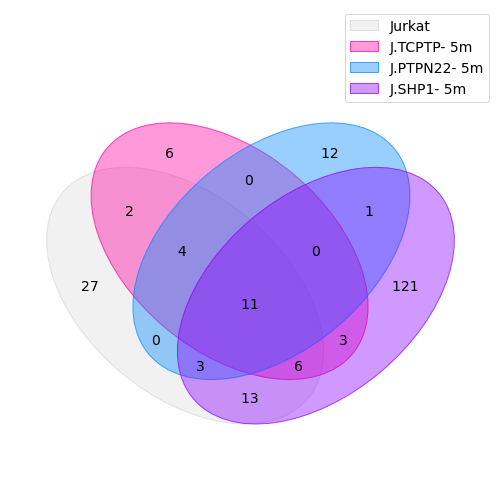

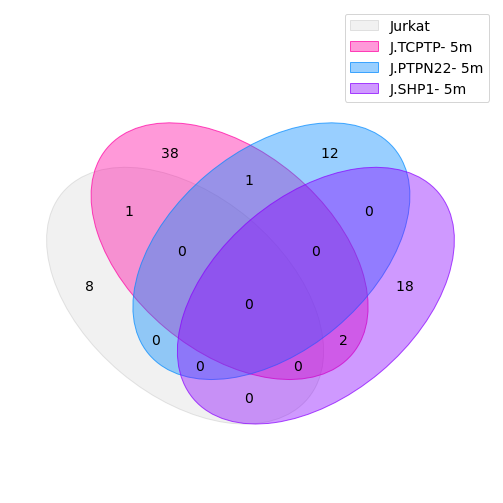

In [24]:
s50d_cols = [c for c in list(file.columns) if "5m0md" in c or c == "U_ID"]
s50d_cols = [c for c in s50d_cols if "p-value" not in c]
s50d_values = [list(file[c].to_numpy()) for c in s50d_cols]
s50d_values = [list(zip(s50d_values[0], s50d_values[i+1], s50d_values[4+(i+1)])) for i in range(4)]
s50d_up = [[row for row in col if row[1] > 0 and row[2] < 0.05] for col in s50d_values]
s50d_up = [[row[0] for row in col] for col in s50d_up]
s50d_dn = [[row for row in col if row[1] < 0 and row[2] < 0.05] for col in s50d_values]
s50d_dn = [[row[0] for row in col] for col in s50d_dn]
print(len(s50d_up))
labelsu = venn.get_labels([set(col) for col in s50d_up])
fig, ax = venn.venn4(labelsu, names = ["Jurkat",
                                      "J.TCPTP- 5m", 
                                      "J.PTPN22- 5m", 
                                      "J.SHP1- 5m"],
                     colors = venn_colours)
plt.savefig("figs/venn_5m0md_up.pdf")
labelsd = venn.get_labels([set(col) for col in s50d_dn])
fig, ax = venn.venn4(labelsd, names = ["Jurkat",
                                       "J.TCPTP- 5m", 
                                      "J.PTPN22- 5m", 
                                      "J.SHP1- 5m"],
                     colors = venn_colours)
plt.savefig("figs/venn_5m0md_dn.pdf")

4


/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


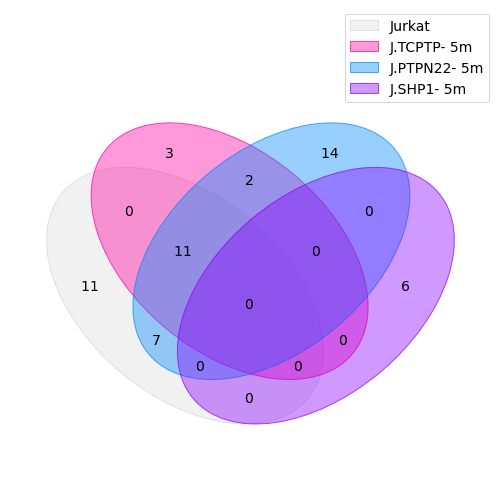

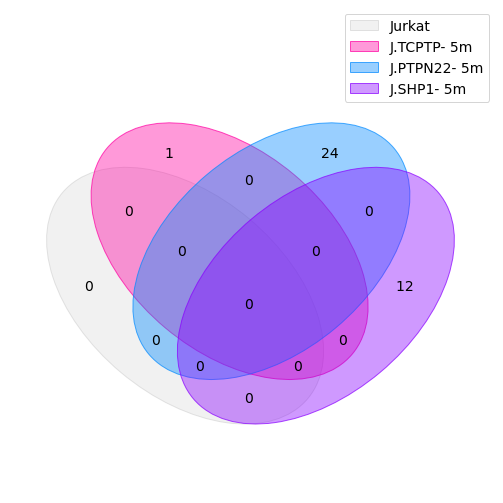

In [25]:
s50u_cols = [c for c in list(file.columns) if "5m0mu" in c or c == "U_ID"]
s50u_cols = [c for c in s50u_cols if "p-value" not in c]
s50u_values = [list(file[c].to_numpy()) for c in s50u_cols]
s50u_values = [list(zip(s50u_values[0], s50u_values[i+1], s50u_values[4+(i+1)])) for i in range(4)]
s50u_up = [[row for row in col if row[1] > 0 and row[2] < 0.05] for col in s50u_values]
s50u_up = [[row[0] for row in col] for col in s50u_up]
s50u_dn = [[row for row in col if row[1] < 0 and row[2] < 0.05] for col in s50u_values]
s50u_dn = [[row[0] for row in col] for col in s50u_dn]
print(len(s50u_up))
labelsu = venn.get_labels([set(col) for col in s50u_up])
fig, ax = venn.venn4(labelsu, names = ["Jurkat",
                                      "J.TCPTP- 5m", 
                                      "J.PTPN22- 5m", 
                                      "J.SHP1- 5m"],
                     colors = venn_colours)
plt.savefig("figs/venn_5m0mu_up.pdf")
labelsd = venn.get_labels([set(col) for col in s50u_dn])
fig, ax = venn.venn4(labelsd, names = ["Jurkat",
                                       "J.TCPTP- 5m", 
                                      "J.PTPN22- 5m", 
                                      "J.SHP1- 5m"],
                     colors = venn_colours)
plt.savefig("figs/venn_5m0mu_dn.pdf")

4


/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


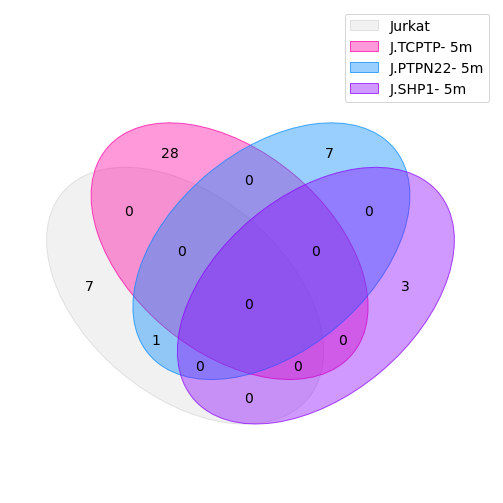

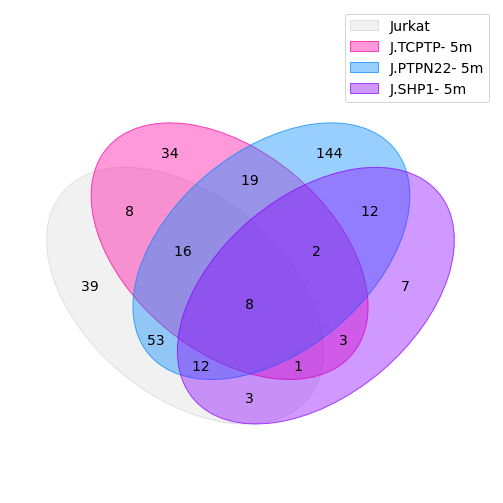

In [26]:
s50u_cols = [c for c in list(file.columns) if "basalpm" in c or c == "U_ID"]
s50u_cols = [c for c in s50u_cols if "p-value" not in c]
s50u_values = [list(file[c].to_numpy()) for c in s50u_cols]
s50u_values = [list(zip(s50u_values[0], s50u_values[i+1], s50u_values[4+(i+1)])) for i in range(4)]
s50u_up = [[row for row in col if row[1] > 0 and row[2] < 0.05] for col in s50u_values]
s50u_up = [[row[0] for row in col] for col in s50u_up]
s50u_dn = [[row for row in col if row[1] < 0 and row[2] < 0.05] for col in s50u_values]
s50u_dn = [[row[0] for row in col] for col in s50u_dn]
print(len(s50u_up))
labelsu = venn.get_labels([set(col) for col in s50u_up])
fig, ax = venn.venn4(labelsu, names = ["Jurkat",
                                      "J.TCPTP- 5m", 
                                      "J.PTPN22- 5m", 
                                      "J.SHP1- 5m"],
                     colors = venn_colours)
plt.savefig("figs/venn_basalpm_up.pdf")
labelsd = venn.get_labels([set(col) for col in s50u_dn])
fig, ax = venn.venn4(labelsd, names = ["Jurkat",
                                       "J.TCPTP- 5m", 
                                      "J.PTPN22- 5m", 
                                      "J.SHP1- 5m"],
                     colors = venn_colours)
plt.savefig("figs/venn_basalpm_dn.pdf")


4


/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/redas/py3/lib/python3.10/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


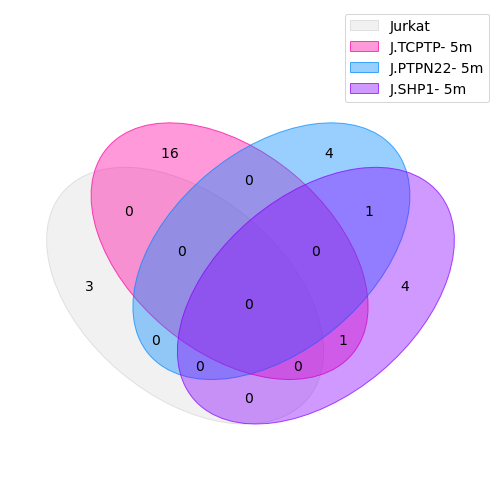

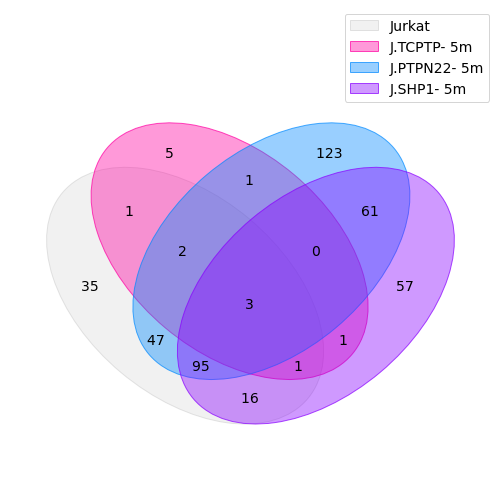

In [27]:
s50u_cols = [c for c in list(file.columns) if "stimpm" in c or c == "U_ID"]
s50u_cols = [c for c in s50u_cols if "p-value" not in c]
s50u_values = [list(file[c].to_numpy()) for c in s50u_cols]
s50u_values = [list(zip(s50u_values[0], s50u_values[i+1], s50u_values[4+(i+1)])) for i in range(4)]
s50u_up = [[row for row in col if row[1] > 0 and row[2] < 0.05] for col in s50u_values]
s50u_up = [[row[0] for row in col] for col in s50u_up]
s50u_dn = [[row for row in col if row[1] < 0 and row[2] < 0.05] for col in s50u_values]
s50u_dn = [[row[0] for row in col] for col in s50u_dn]
print(len(s50u_up))
labelsu = venn.get_labels([set(col) for col in s50u_up])
fig, ax = venn.venn4(labelsu, names = ["Jurkat",
                                      "J.TCPTP- 5m", 
                                      "J.PTPN22- 5m", 
                                      "J.SHP1- 5m"],
                     colors = venn_colours)
plt.savefig("figs/venn_stimpm_up.pdf")
labelsd = venn.get_labels([set(col) for col in s50u_dn])
fig, ax = venn.venn4(labelsd, names = ["Jurkat",
                                       "J.TCPTP- 5m", 
                                      "J.PTPN22- 5m", 
                                      "J.SHP1- 5m"],
                     colors = venn_colours)
plt.savefig("figs/venn_stimpm_dn.pdf")